A part of the codes of this program is referenced from below:

Yadav, K (2021) Cleaning & Preprocessing Text Data by Building NLP Pipeline [Source code]. https://towardsdatascience.com/cleaning-preprocessing-text-data-by-building-nlp-pipeline-853148add68a

In [9]:
!pip install unidecode
!pip install autocorrect
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 7.5 MB/s 


### Import library

In [110]:
import pandas as pd
import numpy as np
import unidecode
import re 
import time 
import nltk.corpus 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer 
from autocorrect import Speller 
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords 
from nltk import word_tokenize 
import string
import sys
import urllib3
import json
http=urllib3.PoolManager()

#
from nltk import wordnet
import nlpaug
import nlpaug.augmenter.word as naw
import matplotlib.pyplot as plt
import seaborn as sns
import math

#
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Define wordcloud function

In [61]:
def print_wordcloud(df, col, msg):
    stopwords = set()
    post_words = ""

    add_word = []
    for posts in df[col]:
        posts = str(posts)
        tokens = posts.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            add_word.append(tokens[i])
    post_words += " ".join(add_word)

    # print("done")
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color = 'white',
                          stopwords = stopwords,
                          min_font_size = 10).generate(post_words)

    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    print(msg)
    plt.show()

### ploting

In [135]:
def plot_count(df,palette):
  sns.countplot(
      x="variable",
      hue="value",
      data=pd.melt(
          df[["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]]
      ),
      palette=palette,
  )

  plt.show()

def cal_print_plot_count(df, palette):
  df['is_Extrovert'] = [1 if x[0]=='E' else 0 for x in df['type']]
  df['is_Sensing'] = [1 if x[1]=='S' else 0 for x in df['type']]
  df['is_Thinking'] = [1 if x[2]=='T' else 0 for x in df['type']]
  df['is_Judging'] = [1 if x[3]=='J' else 0 for x in df['type']]

  i_count = df["is_Extrovert"].value_counts()[0]
  e_count = df["is_Extrovert"].value_counts()[1]

  n_count = df["is_Sensing"].value_counts()[0]
  s_count = df["is_Sensing"].value_counts()[1]

  f_count = df["is_Thinking"].value_counts()[0]
  t_count = df["is_Thinking"].value_counts()[1]

  p_count = df["is_Judging"].value_counts()[0]
  j_count = df["is_Judging"].value_counts()[1]

  print(f"No. of Introverts: {i_count}")
  print(f"No. of Extroverts: {e_count}")
  print(f"No. of Intuition: {n_count}")
  print(f"No. of Sensing: {s_count}")
  print(f"No. of Feelings: {f_count}")
  print(f"No. of Thinking: {t_count}")
  print(f"No. of Perceiving: {p_count}")
  print(f"No. of Judging: {j_count}")
  print()
  plot_count(df, palette)

## Data cleaning function define

### load nltk

In [62]:
#remove stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopWordsList = set(stopwords.words('english'))
#lemmatization
nltk.download("popular")
lemmatizer = nltk.stem.WordNetLemmatizer()
tokenizer = nltk.tokenize.WhitespaceTokenizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]   

### load Abbr Map

In [63]:
AbbrMap={}
def getAbbrMap(s):
    global AbbrMap
    r = http.request('GET', 'https://www.noslang.com/dictionary/'+s)
    soup = BeautifulSoup(r.data, 'html.parser')

    for e in soup.find_all('div', class_="dictonary-word"):
        abbr = e.find('abbr')['title']
        AbbrMap[e.find('span').text[:-2]] = abbr   
addToList = []
for i in range(97,123):
    getAbbrMap(chr(i))
display(AbbrMap)
with open('ShortendText.json', 'w') as file:
    jsonDict = json.dump(AbbrMap, file)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'a$$': 'ass',
 'a&f': 'always and forever',
 "a'ight": 'alright',
 'A-hole': 'a**h**e',
 'a.i.m.': 'aol instant messanger',
 'a/l': 'age and location',
 'a/m': 'away message',
 'a/s/l': 'age,sex,location',
 'a/s/l/p': 'age/sex/location/picture',
 'a/s/l/r': 'age, sex, location, race',
 'a1t': 'anyone there',
 'A2A': 'Ask to Answer',
 'a3': 'anyplace, anywhere, anytime',
 'a4u': 'all for you',
 'A7X': 'Avenged Sevenfold',
 'A8t': 'Alright ',
 'aaaaa': 'American Assosciation Against Acronym Abuse',
 'aabf': 'as a best friend',
 'aaf': 'as a friend',
 'aak': 'Alive and Kicking',
 'aamof': 'as a matter of fact',
 'aatf': 'always and totally forever',
 'aatw': 'all around the world',
 'abd': 'Already Been Done',
 'abend': 'absent by enforced net deprivation',
 'abft': 'About f**king Time',
 'aboot': 'about',
 'abreev': 'abbreviation',
 'absnt': 'absent',
 'abt': 'about',
 'abwt': 'about',
 'acc': 'account',
 'acct': 'account',
 'acgaf': "Absolutely couldn't give a f**k",
 'ack': 'acknowled

### define functions

#### get Abbr Map dict

In [64]:
AbbrMap={}
def getAbbrMap(text):
    global AbbrMap
    r = http.request('GET', 'https://www.noslang.com/dictionary/'+text)
    soup = BeautifulSoup(r.data, 'html.parser')

    
    for e in soup.find_all('div', class_="dictonary-word"):
        abbr = e.find('abbr')['title']
        AbbrMap[e.find('span').text[:-2]] = abbr
        
addToList = []

for i in range(97,123):
    getAbbrMap(chr(i))
    
display(AbbrMap)
    
with open('ShortendText.json', 'w') as file:
    jsonDict = json.dump(AbbrMap, file)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

{'a$$': 'ass',
 'a&f': 'always and forever',
 "a'ight": 'alright',
 'A-hole': 'a**h**e',
 'a.i.m.': 'aol instant messanger',
 'a/l': 'age and location',
 'a/m': 'away message',
 'a/s/l': 'age,sex,location',
 'a/s/l/p': 'age/sex/location/picture',
 'a/s/l/r': 'age, sex, location, race',
 'a1t': 'anyone there',
 'A2A': 'Ask to Answer',
 'a3': 'anyplace, anywhere, anytime',
 'a4u': 'all for you',
 'A7X': 'Avenged Sevenfold',
 'A8t': 'Alright ',
 'aaaaa': 'American Assosciation Against Acronym Abuse',
 'aabf': 'as a best friend',
 'aaf': 'as a friend',
 'aak': 'Alive and Kicking',
 'aamof': 'as a matter of fact',
 'aatf': 'always and totally forever',
 'aatw': 'all around the world',
 'abd': 'Already Been Done',
 'abend': 'absent by enforced net deprivation',
 'abft': 'About f**king Time',
 'aboot': 'about',
 'abreev': 'abbreviation',
 'absnt': 'absent',
 'abt': 'about',
 'abwt': 'about',
 'acc': 'account',
 'acct': 'account',
 'acgaf': "Absolutely couldn't give a f**k",
 'ack': 'acknowled

#### stopword initialize

In [65]:
nltk.download('stopwords')
nltk.download('punkt')
stopWordsList = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### lemmatization initialize

In [66]:
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()
tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### delete HTML

In [67]:
def deleteHTML(text):
    soup = BeautifulSoup(text, "html.parser")
    stripText = soup.get_text(separator=" ")
    return stripText

#### change Accented Char

In [68]:
def changeAccentedChar(text):
    text = unidecode.unidecode(text)
    return text

#### minimize Repeat

In [69]:
def minRepeat(text):
    patternChar = re.compile(r"([A-Za-z0-9])\1{1,}", re.DOTALL)
    limitTwoChar = patternChar.sub(r"\1\1", text)
    patternPunc = re.compile(r'([.,/#!\$%^&<>*?;'':{}=_`~()"])\1{1,}')
    limitPunc = patternPunc.sub(r'\1', limitTwoChar)
    finalPattern = re.sub(' {2,}', ' ', limitPunc)
    return finalPattern

#### expand Contractions

In [70]:
def expandContractions(text):
    Contractions = {
        "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    splitText = text.lower().split(' ')

    for Word in splitText:
        if Word in Contractions:
            splitText = [item.replace(Word, Contractions[Word])
                        for item in splitText]
    StringText = ' '.join(str(e) for e in splitText)
    return StringText

#### getAbbr

In [71]:
def getAbbr(text):
    splitText = text.split()
    
    for i in text.split():
        if i in AbbrMap:
#           print(i, AbbrMap[i])
            splitText[splitText.index(i)] = AbbrMap[i]
    return ' '.join(splitText)


#### deleteSpecChar

In [72]:
def deleteSpecChar(text):
    formatText = re.sub(r"[^a-zA-Z0-9]+", ' ', str(text))
    return formatText

#### remove stopwords

In [73]:
def removeStopwords(text):
    text = repr(text)
    
    wordTokens = nltk.word_tokenize(text)
            
    wordTokensNostops = [word for word in wordTokens 
                         if word.lower() not in stopWordsList]
    wordString = ' '.join(wordTokensNostops)
    
    return wordString

#wordString = removeStopwords('Why is this so difficult?')
#display(wordString)

#### lemmatization

In [74]:
def lemmatization(text):
    lemmatized = ""
    for w in tokenizer.tokenize(text):
        word = lemmatizer.lemmatize(w, 'v')+ " "
        lemmatized += word
    return lemmatized

#### clean_all_in_one

In [101]:
# combine most data cleaning action in one go
def clean1(df, col):
  #replace separator with space
  df['clean_X'] = df[col].str.replace(re.compile(r"\|\|\|"), " ")

  #convert into lower case
  df['clean_X'] = df['clean_X'].str.lower()

  #delete new line tabs
  df['clean_X'] = df['clean_X'].str.replace('\\n', ' ').replace('\n', ' ').replace('\t', ' ').replace('\\', ' ')

  #delete links
  df['clean_X'] = df['clean_X'].str.replace(re.compile(r'https?:\/\/[^\s]*[\r\n]*'),"")
  df['clean_X'] = df['clean_X'].str.replace(re.compile(r"\ [A-Za-z0-9.]*\.com"),"")

  #delete space & punctuations
  df['clean_X'] = df['clean_X'].str.replace(re.compile(r"\s+")," ").replace('?', ' ? ').replace(')', ') ').replace('!', ' ! ')
  df['clean_X'] = df['clean_X'].str.lstrip("'")
  df['clean_X'] = df['clean_X'].str.rstrip("'")
  df['clean_X'] = df['clean_X'].str.lstrip(" ")
  df['clean_X'] = df['clean_X'].str.rstrip(" ")
  df['clean_X'] = df['clean_X'].apply(unidecode.unidecode)
  df['clean_X'] = df['clean_X'].apply(deleteHTML)
  df['clean_X'] = df['clean_X'].apply(minRepeat)
  df['clean_X'] = df['clean_X'].apply(expandContractions)
  df['clean_X'] = df['clean_X'].apply(getAbbr)
  df['clean_X'] = df['clean_X'].apply(deleteSpecChar)
  df['clean_X'] = df['clean_X'].apply(removeStopwords)
  df['clean_X'] = df['clean_X'].apply(lemmatization)
 
  df['clean_X'] = df['clean_X'].str.lstrip("''")
  df['clean_X'] = df['clean_X'].str.rstrip("''")
  df['clean_X'] = df['clean_X'].str.lstrip("' ")
  df['clean_X'] = df['clean_X'].str.rstrip("' ")
  df['clean_X'] = df['clean_X'].str.lstrip("'")
  df['clean_X'] = df['clean_X'].str.rstrip("'")
  df['clean_X'] = df['clean_X'].str.lstrip(" '")
  df['clean_X'] = df['clean_X'].str.rstrip(" '")

  return df

# Main program

## Training Sets

### Load the program

In [107]:
if __name__ == "__main__":
  mtrain_df = pd.read_csv("mbti_1.csv", encoding = "latin-1")
  mtrain_df.columns = ['type', 'posts'] 

In [108]:
  cleaned_mtrain_df = clean1(mtrain_df, 'posts')
  cleaned_mtrain_df.rename(columns={'clean_X':'clean_posts'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


### Data Analysis

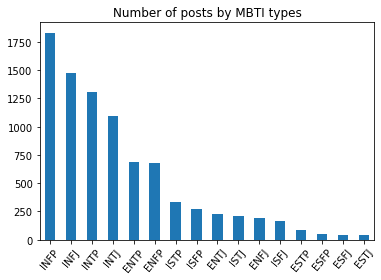

In [92]:
  mtrain_df['type'].value_counts().plot.bar(rot=50, title='Number of posts by MBTI types')

No. of Introverts: 6676
No. of Extroverts: 1999
No. of Intuition: 7478
No. of Sensing: 1197
No. of Feelings: 4694
No. of Thinking: 3981
No. of Perceiving: 5241
No. of Judging: 3434



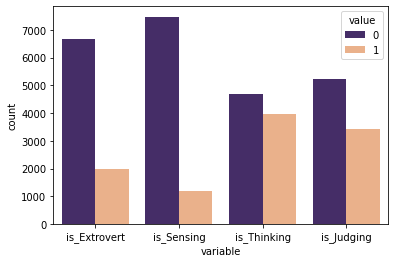

In [136]:
palette=["#432371","#FAAE7B"]
cal_print_plot_count(mtrain_df, palette)

raw


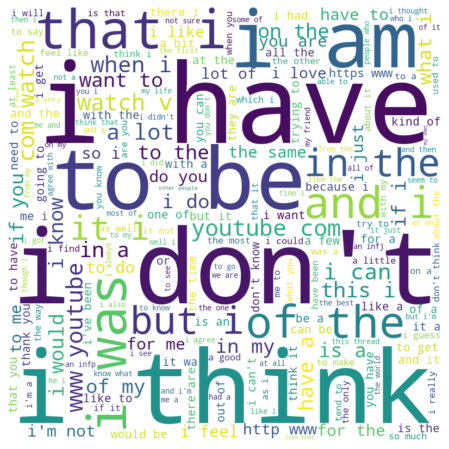

cleaned


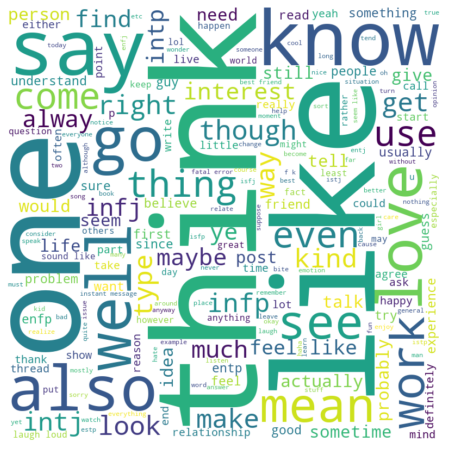

In [125]:
  print_wordcloud(cleaned_mtrain_df, 'posts','raw')
  print_wordcloud(cleaned_mtrain_df, 'clean_posts','cleaned')

### Load supplimentary training set

In [153]:
  sup_train_df = pd.read_csv(r'WASSAdataset', sep = "\t", encoding = 'latin-1')
  sup_train_df = sup_train_df.drop(sup_train_df.columns[[1,2]], axis=1)
  sup_train_df.columns = ['type', 'posts']

  #drop majority types
  not_to_keep = ['INFP', 'INFJ','INTP','INTJ','ENTP','ENFP']
  filter_df = sup_train_df[~np.isin(sup_train_df['type'], not_to_keep)]
  filter_df  


,type,posts
0,ENFJ,say what ? this weekend has been full of surpr...
1,ENFJ,daaamn ru was so mad .... @URL / cv9vzqrtjk da...
2,ENFJ,"in all , i may have slept an uninterrupted 45 ..."
3,ENFJ,that tumblr post comparing louis ' laugh to a ...
4,ENFJ,rt @USER : and those people are not the religi...
...,...,...
1490,ESFJ,â @USER : every time i show / tell my mom so...
1491,ESTJ,6.7 on the bike ! 2.7 on the elliptical ! alre...
1496,ENFJ,* sighs * i slept half of the day now because ...
1497,ENFJ,@USER hahaha yesss ... and now begins my very ...


In [154]:
  cleaned_sup_train_df = clean1(filter_df, 'posts')
  cleaned_sup_train_df.rename(columns={'clean_X':'clean_posts'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-

In [155]:
cleaned_sup_train_df

,type,posts,clean_posts
0,ENFJ,say what ? this weekend has been full of surpr...,say weekend full surprise like package ahh ima...
1,ENFJ,daaamn ru was so mad .... @URL / cv9vzqrtjk da...,daamn mad url cv9vzqrtjk dammit pearl get toge...
2,ENFJ,"in all , i may have slept an uninterrupted 45 ...",in may sleep uninterrupted 45 minutes last nig...
3,ENFJ,that tumblr post comparing louis ' laugh to a ...,that tumblr post compare louis laugh goat rt u...
4,ENFJ,rt @USER : and those people are not the religi...,rt user people religion user every religion vi...
...,...,...,...
1490,ESFJ,â @USER : every time i show / tell my mom so...,user every time show tell mom something funny ...
1491,ESTJ,6.7 on the bike ! 2.7 on the elliptical ! alre...,6 7 bike 2 7 elliptical already 10 miles morni...
1496,ENFJ,* sighs * i slept half of the day now because ...,sigh sleep half day feel ill ugh user agm qual...
1497,ENFJ,@USER hahaha yesss ... and now begins my very ...,user hahaha yess begin first veishea aahh user...


### Merge and save data

In [156]:
  combine_df = pd.concat([cleaned_mtrain_df, cleaned_sup_train_df])
  header = ["type", "clean_posts"]
  combine_df.to_csv('new_clean_data.csv', encoding='utf-8', index = 'False', columns = header)

In [157]:
  combine_df.shape

(9220, 7)

### Data Analysis2

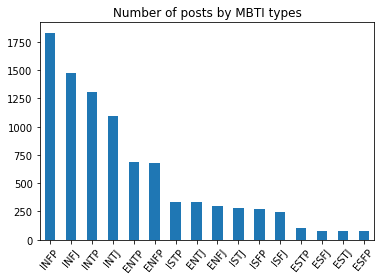

In [126]:
  combine_df['type'].value_counts().plot.bar(rot=50, title='Number of posts by MBTI types')

No. of Introverts: 6828
No. of Extroverts: 2319
No. of Intuition: 7685
No. of Sensing: 1462
No. of Feelings: 4938
No. of Thinking: 4209
No. of Perceiving: 5282
No. of Judging: 3865



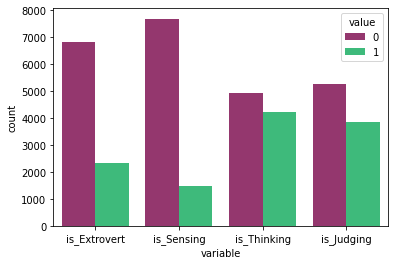

In [138]:
palette=["#A32871","#2ACE7B"]
cal_print_plot_count(combine_df, palette)

## Movie data set

### Load the movie

In [145]:
  #Read Dataset 
  movie_df = pd.read_csv(r'IMDB-Dataset.csv', encoding = 'latin-1')

  #Drop column
  movie_df = movie_df.drop(movie_df.columns[[3]], axis=1)

  #Rename columns
  movie_df.columns=['rating', 'review', 'movie']

  #Drop rows of rating<6
  movie_df = movie_df.drop(movie_df[movie_df.rating<6].index)

  #change rating from number to 'positive'
  movie_df = movie_df.assign(rating='Positive')

  #Testing
  display (movie_df.head())
  movie_df.shape

  cleaned_movie_df = clean1(movie_df, 'review')




,rating,review,movie
42474,Positive,The trailers of Badrinath clubbed with the sta...,Badrinath
47183,Positive,We just came home from seeing Pulse. Sorry fri...,Pulse
48406,Positive,Steven Seagal might be getting old and he also...,Mercenary for Justice
60125,Positive,I like this german court show. Like real cases...,Richterin Barbara Salesch
75004,Positive,"America's got talent! We've had Hank Williams,...",Justin Bieber: Never Say Never


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


In [151]:
  header = ["rating","clean_X", "movie"]
  cleaned_movie_df.to_csv('clean_movie.csv', encoding='utf-8', index = 'False', columns = header)  

In [150]:
  cleaned_movie_df

,rating,review,movie,clean_X
42474,Positive,The trailers of Badrinath clubbed with the sta...,Badrinath,the trailers badrinath club star cast boast na...
47183,Positive,We just came home from seeing Pulse. Sorry fri...,Pulse,we come home see pulse sorry friends one film ...
48406,Positive,Steven Seagal might be getting old and he also...,Mercenary for Justice,steven seagal might get old also might shape 2...
60125,Positive,I like this german court show. Like real cases...,Richterin Barbara Salesch,like german court show like real case educatio...
75004,Positive,"America's got talent! We've had Hank Williams,...",Justin Bieber: Never Say Never,america get talent hank williams johnny cash e...
...,...,...,...,...
149995,Positive,GoldenEye (1995) is my number 1 personal favor...,GoldenEye,goldeneye 1995 number 1 personal favorite movi...
149996,Positive,"*** 1/2Starring: Pierce Brosnan, Izabella Scor...",GoldenEye,1 2starring pierce brosnan izabella scorupco s...
149997,Positive,"I've given this film a 10, not just because I ...",GoldenEye,give film 10 thoroughly enjoy believe best bon...
149998,Positive,I absolutely adore this movie. What a comeback...,GoldenEye,absolutely adore movie comeback bond timothy d...


raw


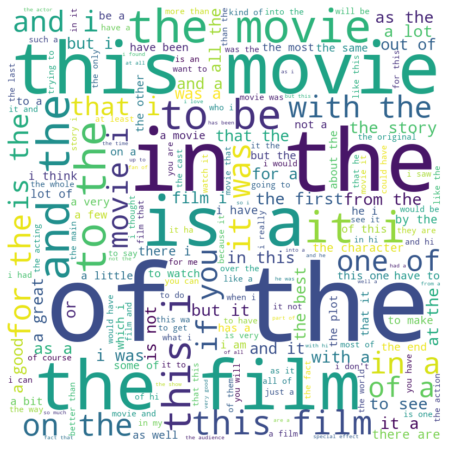

cleaned


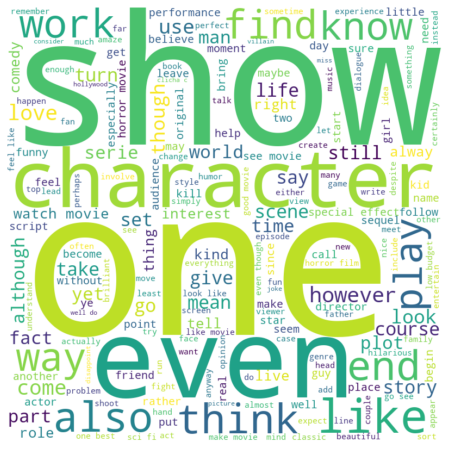

In [147]:
  print_wordcloud(cleaned_movie_df, 'review','raw')
  print_wordcloud(cleaned_movie_df, 'clean_X','cleaned')